In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np
import yfinance as yf

In [11]:
yf.__version__

'0.2.55'

In [13]:
start = datetime.datetime(2014, 5, 31)
end = datetime.datetime(2024, 5, 31)

In [143]:
aapl = yf.download('AAPL', start, end)
nvda = yf.download('NVDA', start, end)
tsla = yf.download('TSLA', start, end)
ford = yf.download('FORD', start, end)
jp_morgan = yf.download('JPM', start, end)
goldman_sachs = yf.download('GS', start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [145]:
aapl.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2014-06-02,19.792873,19.987449,19.599243,19.960058,369350800
2014-06-03,20.072773,20.110556,19.780280,19.786892,292709200
2014-06-04,20.301981,20.398640,20.027749,20.069624,335482000
2014-06-05,20.381632,20.445232,20.232395,20.345425,303805600
2014-06-06,20.325598,20.504748,20.290966,20.461928,349938400


In [147]:
#I DataFrame originali presentano colonne multiIndici (Price e Ticker), il che possono essere un problema al momento di manipolare i dati per quanto
#riguardano i formati di ritorno. Quindi, rimuoviamo l'indice di colonna "Ticker" che non aggiunge informazione utile se non il nome dell'azione.
aapl = aapl.xs('AAPL', axis=1, level = 'Ticker', drop_level=True)
nvda = nvda.xs('NVDA', axis=1, level = 'Ticker', drop_level=True)
tsla = tsla.xs('TSLA', axis=1, level = 'Ticker', drop_level=True)
ford = ford.xs('FORD', axis=1, level = 'Ticker', drop_level=True)
jp_morgan = jp_morgan.xs('JPM', axis=1, level = 'Ticker', drop_level=True)
goldman_sachs = goldman_sachs.xs('GS', axis=1, level = 'Ticker', drop_level=True)

In [167]:
# Creo un dizionario in cui tengo memorizzato il nome dell'azione originale e il nome della variabile corrispondente da me creata.
azioni_semplici = {
    'AAPL': aapl, 
    'NVDA': nvda,
    'TSLA': tsla, 
    'FORD': ford,
    'JPM': jp_morgan,
    'GS': goldman_sachs
}
#Calcolo del rendimento cumulato e rendimento composto annuo 
def calcola_rendimento_cumulato(df, colonna = 'Close'):
    prezzo_iniziale = df[colonna].iloc[0]
    prezzo_finale = df[colonna].iloc[-1]
    rendimento_cumulato = (prezzo_finale / prezzo_iniziale) - 1
    return rendimento_cumulato

for key, azione in azioni.items():
    rendimento = calcola_rendimento_cumulato(azione)
    print(f"{key}: {rendimento:.4%}")

AAPL: 863.2217%
NVDA: 24413.0854%
TSLA: 1210.1367%
FORD: -61.9403%
JPM: 375.6964%
GS: 241.2203%


In [163]:
def calcola_rendimento_composto_annuo(df, colonna = 'Close'):
    prezzo_iniziale = df[colonna].iloc[0]
    prezzo_finale = df[colonna].iloc[-1]
    #Calcolo numero di anni (giorni_totali / 365)
    giorni_tot = (df.index[-1] - df.index[0]).days
    anni = giorni_tot / 365.25 #Teniamo in considerazione gli anni bisestili (Ogni 4 anni ce n'e' uno in piu': +0.25)
    rendimento_composto_annuo = (prezzo_finale / prezzo_iniziale) ** (1 / anni) - 1
    return rendimento_composto_annuo

for key, azione in azioni.items():
    cagr = calcola_rendimento_composto_annuo(azione)
    print(f"{key}: {cagr:.4%}")

AAPL: 25.4411%
NVDA: 73.4217%
TSLA: 29.3624%
FORD: -9.2142%
JPM: 16.8905%
GS: 13.0681%


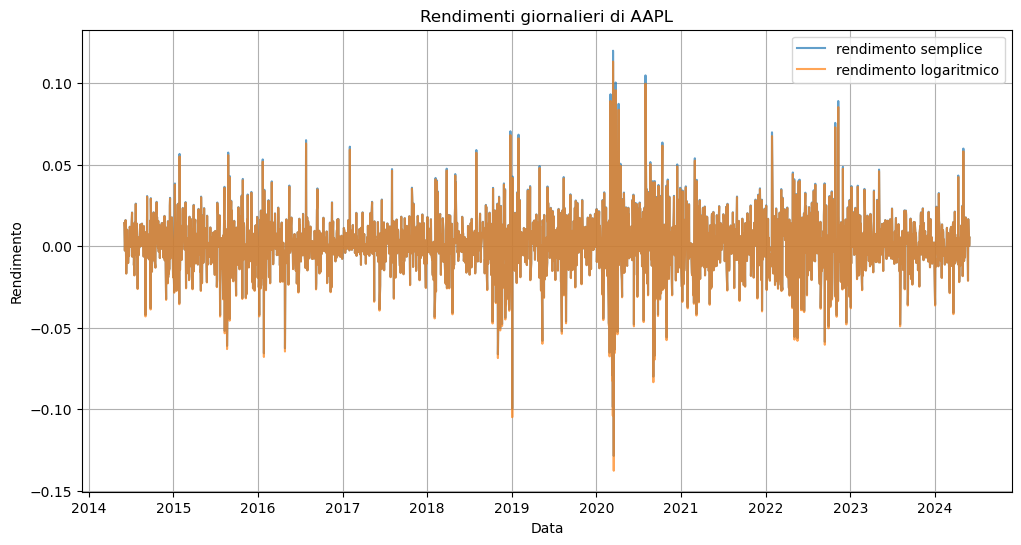

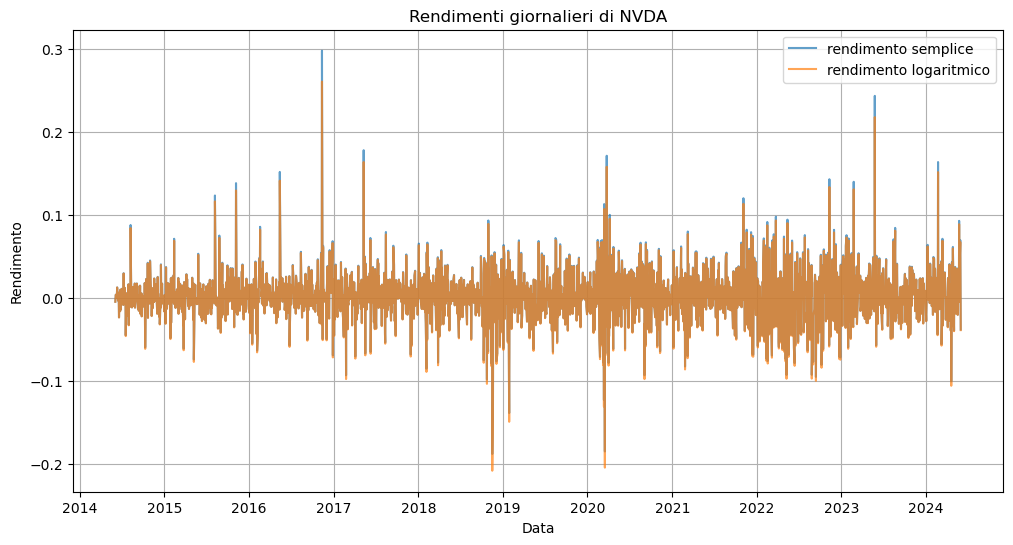

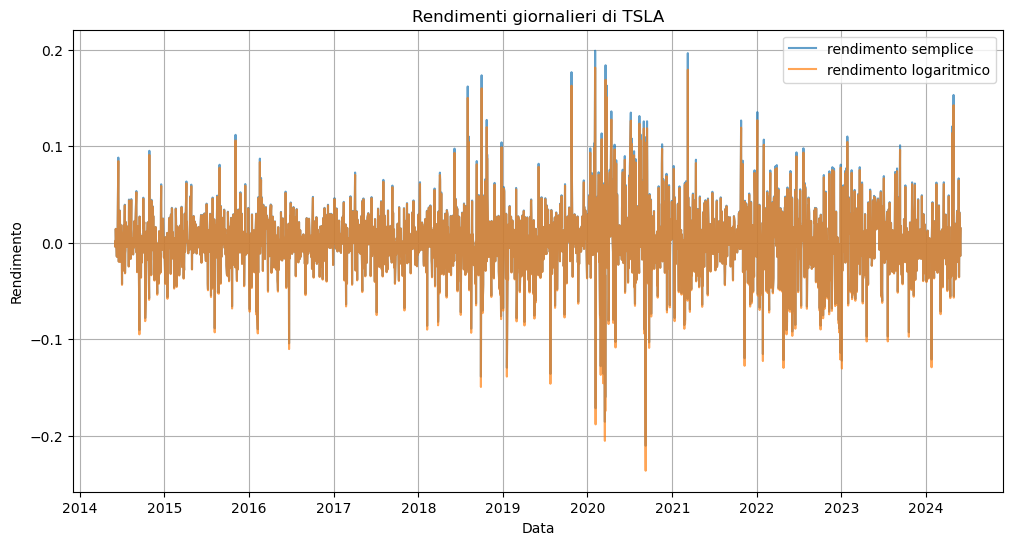

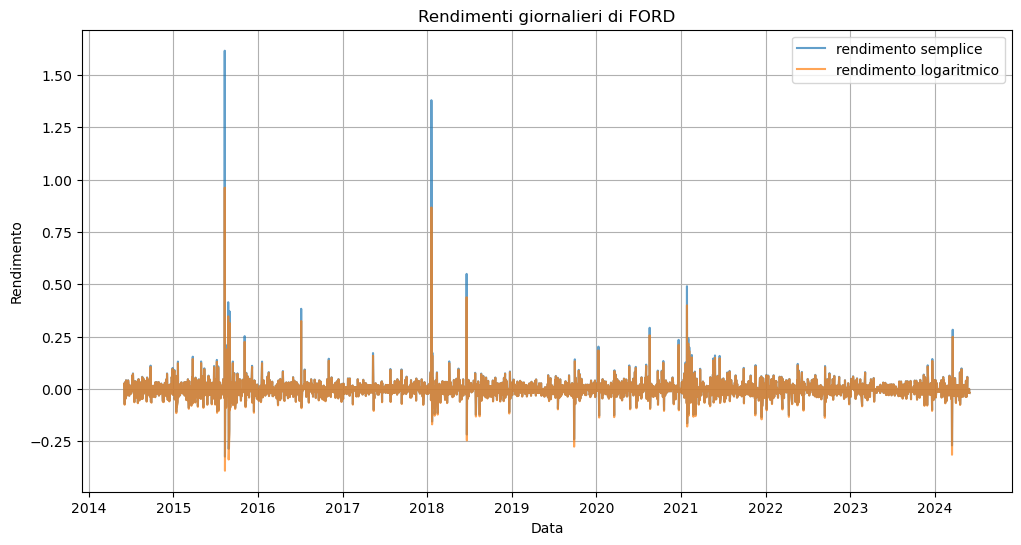

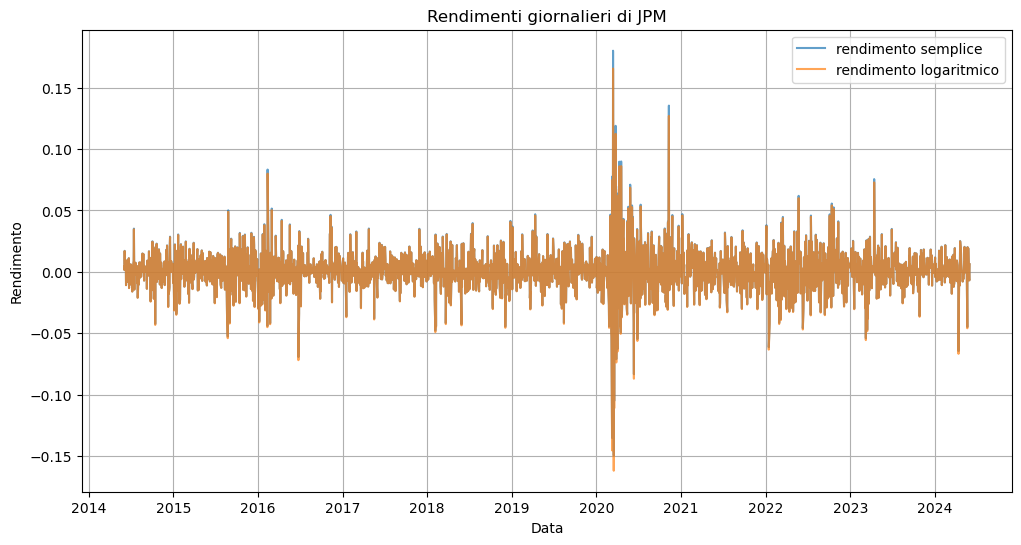

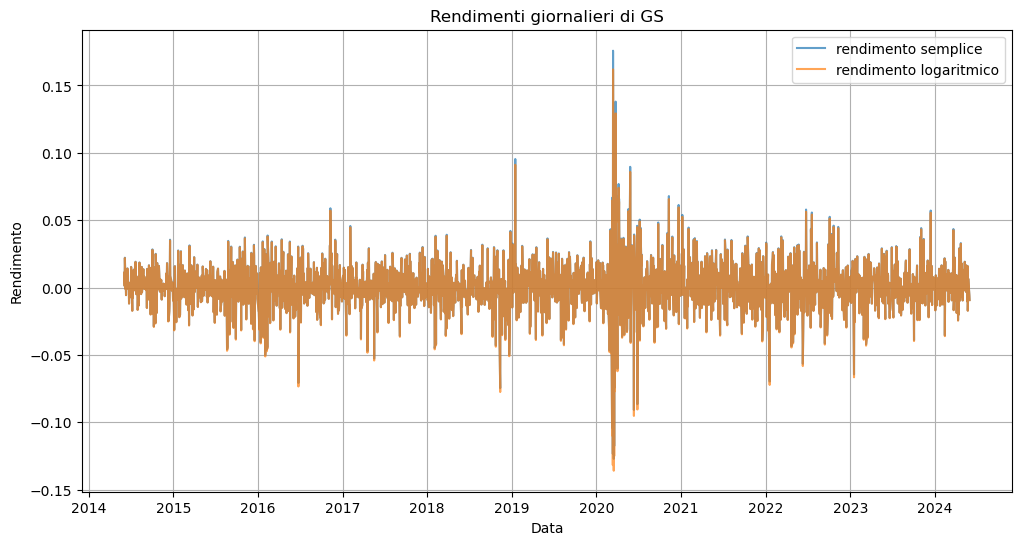

In [171]:
#Calcolo del rendimenti semplici e rendimenti logaritmici
for key, azione in azioni.items():
    azione['ritorno_semplice'] = azione['Close'].pct_change()
    azione['ritorno_logaritmico'] = np.log(azione['Close'] / azione['Close'].shift(1))
    plt.figure(figsize = (12, 6))
    plt.plot(azione['ritorno_semplice'], label = 'rendimento semplice', alpha = 0.7)
    plt.plot(azione['ritorno_logaritmico'], label = 'rendimento logaritmico', alpha = 0.7)
    plt.title(f"Rendimenti giornalieri di {key}")
    plt.xlabel("Data")
    plt.ylabel("Rendimento")
    plt.legend()
    plt.grid(True)
    plt.show()